Followed tutorial by edureka! (https://www.youtube.com/watch?v=2xqvGZS7NCw&ab_channel=edureka%21)

In [31]:
import cv2
import  numpy as np
import  matplotlib.pyplot as plt

#  Load Image

In [32]:
def  read_file(name):
    img = cv2.imread(name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convert to RGB
    plt.imshow(img)
    plt.show()
    return img

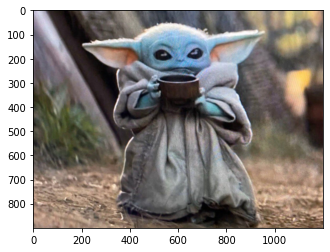

In [33]:
img = read_file('yoda.jpg') #display file in directory

# Create  Edges

In [34]:
def edges(img, line_width, blur):
    '''convert img to greyscale with specified blur'''
    grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # img must be defined as variable / returned from read_file
    grey_blur  = cv2.medianBlur(grey, blur) # https://theailearner.com/tag/cv2-medianblur/

    '''
    define edges for  given img
    https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
    '''

    edges = cv2.adaptiveThreshold(grey_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,  cv2.THRESH_BINARY, line_width, blur)
    return edges

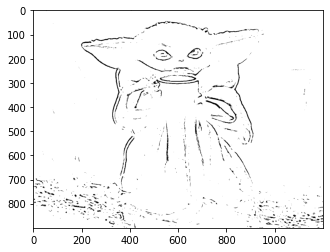

In [35]:
line_width, blur = 7,7
edges = edges(img, line_width, blur)
plt.imshow(edges, cmap='gray') #cmap options: https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.show()


# Reduce Colors

In [36]:
def color_count(img, num):
    #Convert colors
    data = np.float32(img).reshape((-1,3)) #float32 for kmeans clustering
    
    #Define Criteria
    criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,20, .001)

    ret, label, center = cv2.kmeans(data, num, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 
    #documentation: https://docs.opencv.org/4.x/d1/d5c/tutorial_py_kmeans_opencv.html
    #input args for kmeans clustering: samples, number of clusters, critera (stop at x accuracy), attempts, flags(number of inital centers)
    #outputs: compactness, labels (array), centers  of each cluster
    center = np.uint8(center)
    result  = center[label.flatten()]
    result = result.reshape(img.shape)

    return result

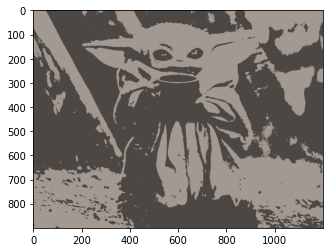

In [37]:
img_split = color_count(img, num=2)

plt.imshow(img_split)
plt.show()

# Reduce Noise

In [38]:
blurred = cv2.bilateralFilter(img, d = 3, sigmaColor=200, sigmaSpace=200)

# Combine Mask with Color Groupus

In [39]:
def final(blurred):
    c = cv2.bitwise_and(blurred, blurred, mask=edges)

    plt.imshow(c)
    plt.show()

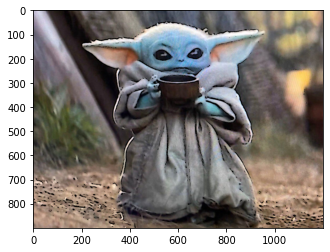

In [40]:
final(blurred)